In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

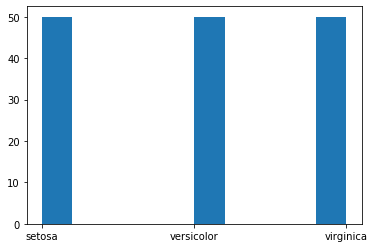

In [4]:
plt.hist(data.Species)

In [5]:
colname = data.columns.values.tolist()
predictors = colname[:4]
target = colname[4]

In [6]:
import numpy as np

In [11]:
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

In [12]:
print(data.is_train)

0      False
1       True
2      False
3       True
4      False
       ...  
145     True
146     True
147     True
148    False
149    False
Name: is_train, Length: 150, dtype: bool


In [13]:
train, test = data[data["is_train"]== True], data[data["is_train"]== False]

In [14]:
print(len(train))
print(len(test))

107
43


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state = 99)
tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [17]:
preds = tree.predict(test[predictors])

In [19]:
pd.crosstab(test[target],preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,13,2
virginica,0,0,15


Visualizacion del Árbol de decisión

In [20]:
from sklearn.tree import export_graphviz

In [22]:
with open("./iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [23]:
import os
from graphviz import Source

In [24]:
file = open("./iris_dtree.dot","r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.584\\nsamples = 107\\nvalue = [37, 35, 35]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 1.0\\nsamples = 70\\nvalue = [0, 35, 35]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.398\\nsamples = 38\\nvalue = [0, 35, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 34, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 0, 32]"] ;\n2 -> 6 ;\n}'

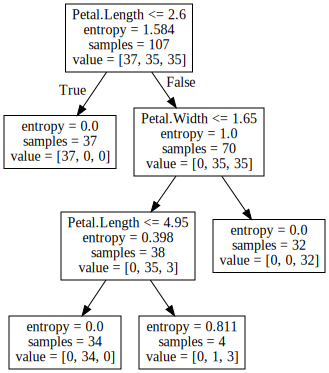

In [25]:
Source(text)